# Sample Chi Squared Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
# Self-generated data collection 
class DataGenerator:
    def __init__(self, p1, p2):
        self.p1 = p1 # the probability of clicks of group 1
        self.p2 = p2 # the probability of clicks of group 2    
        # p1 on the right is used for user input
        
    def next(self):
        
        #np.random.random() #Returns random floats in [0.0, 1.0)
        # if random generated number is less than user input probability 0.1 (very likely)
        # then we count it as a "1-click", otherwise "0-click" 
        
        click1 = 1 if (np.random.random() < self.p1) else 0 
        click2 = 1 if (np.random.random() < self.p2) else 0
        
        return click1, click2 
        # returns the result of one experiment e.g. click1 = 1, click2 = 0

def get_p_value(T):
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    #calculate the test statistic of chi square
    t_chi = (float(det*det)*T.sum()) / (T[0].sum()*T[1].sum()*T[:,0].sum()*T[:,1].sum())
    p = 1 - chi2.cdf(x=t_chi, df=1)
    return p

def run_experiment(p1, p2, N):
    data = DataGenerator(p1, p2)
    p_values = np.empty(N)
    T = np.zeros((2,2)).astype(np.float32)
    
    for i in xrange(N):
        c1, c2 = data.next() # get the click result from one experiment e.g. click1 = 1, click2 = 0
        T[0, c1] += 1 # accumulate the result counts for click1
        T[1, c2] += 1 # accumulate the result counts for click2
        if i <10:
            p_values[i] = None # just in case when the denominator equals to zero
        else:
            p_values[i] = get_p_value(T)
            
    plt.plot(p_values)
    plt.plot(np.ones(N)*0.05) # Set the significance level of 0.05
    plt.show()

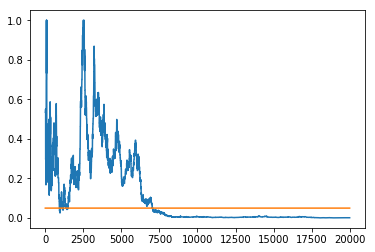

In [3]:
run_experiment(0.1, 0.11, 20000)

Conclusion: click1 and click2 has no significant difference after a certain amount of experiments. After all, their probablities only differ 0.01. 

# Example: Ad CTRs

In [4]:
import pandas as pd

In [5]:
dat = pd.read_csv("ad_clicks.csv", sep=',', skiprows=1, names=['ad','action'])

In [6]:
dat.head(5)

,ad,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [7]:
ad_A = dat[dat["ad"] == 'A']

In [8]:
ad_B = dat[dat["ad"] == 'B']

In [9]:
ad_A_clicks = ad_A["action"].sum()

In [10]:
ad_A_clicks = ad_A[(ad_A.action>=1)].count()["action"]

In [11]:
ad_A_no_clicks = ad_A[(ad_A.action<1)].count()["action"]

In [12]:
ad_B_clicks = ad_B[ad_B["action"]==1].sum()["action"]

In [13]:
ad_B_no_clicks = ad_B[ad_B["action"]==0].count()["action"]

In [14]:
T2 = np.zeros((2,2)).astype(np.float32)

In [15]:
T2

array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)

In [16]:
T2[0,0] = ad_A_clicks
T2[0,1] = ad_A_no_clicks
T2[1,0] = ad_B_clicks
T2[1,1] = ad_B_no_clicks

In [17]:
T2

array([[ 304.,  696.],
       [ 372.,  628.]], dtype=float32)

In [18]:
def get_p_value2(T):
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    #calculate the test statistic of chi square
    t_chi = (float(det*det)*T.sum()) / (T[0].sum()*T[1].sum()*T[:,0].sum()*T[:,1].sum())
    p = 1 - chi2.cdf(x=t_chi, df=1)
    return p

In [19]:
get_p_value2(T2)

0.0013069500472003837

Conclusion: the two advertisements are different in CTR at the significant level of at the significance level of 0.05.  

Another way to form and assign values to a matrix:

In [20]:
T3 = np.array([[ad_A_clicks, ad_A_no_clicks], [ad_B_clicks, ad_B_no_clicks]])

In [21]:
T3

array([[304, 696],
       [372, 628]], dtype=int64)

In [22]:
get_p_value2(T3)

0.0013069502732125926